# Pima Indians Heritage Diabetes - Hypothesis Testing Port Folio Project

This notebook presents a statistical exploration of the Pima Indians Diabetes Dataset, sourced from Kaggle. The dataset contains medical and demographic information for female patients of Pima Indian heritage, aged 21 and older, with a binary outcome indicating the presence or absence of diabetes.

The primary objective of this analysis is to apply hypothesis testing techniques to investigate whether certain health indicators and demographic features differ significantly between diabetic and non-diabetic individuals. This approach not only supports data-driven insights but also demonstrates the application of statistical rigor in real-world health data.


## Goals of the Analysis
The aim is to test the following null hypotheses using appropriate statistical methods (e.g., t-tests, Mann–Whitney U tests, chi-square tests):
- **Glucose Levels**
H₀: BMI does not significantly differ between diabetic and non-diabetic individuals.
- **Age**
H₀: There is no difference in average glucose levels between diabetic and non-diabetic individuals.
- **Body Mass Index (BMI)**
H₀: Age is not associated with diabetes outcome.
- **Pregnancies**
H₀: The number of pregnancies does not affect diabetes likelihood.
- **Blood Pressure**
H₀: Blood pressure does not significantly differ between diabetic and non-diabetic individuals.
- **Diabetes Pedigree Function (DPF)**
H₀: DPF does not significantly differ between diabetic and non-diabetic individuals.

Each hypothesis will be tested using a combination of exploratory data analysis, visualization, and statistical inference, with clear annotations to guide interpretation and highlight key findings.
 

## Importing Essential Libraries for Statistical Analysis and Visualization

In this section, we import the core Python libraries required for hypothesis testing, data manipulation, and visualization. These tools form the backbone of our analytical workflow.

### Statistical Testing Modules
- `ttest_ind` from `scipy.stats`: Performs an independent two-sample t-test to compare the means of two groups.
- `chi2_contingency` from `scipy.stats`: Executes a chi-square test of independence on a contingency table.
- `mannwhitneyu` from `scipy.stats`: Conducts the Mann-Whitney U test, a non-parametric alternative to the t-test for comparing two independent samples.

### Visualization Libraries
- `seaborn`: A high-level interface for drawing attractive and informative statistical graphics.
- `matplotlib.pyplot`: A foundational plotting library used for creating static, animated, and interactive visualizations.

### Data Handling Library
- `pandas`: Provides data structures and functions needed to manipulate structured data efficiently.


In [133]:

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


## Load and Inspect Data

The dataset contains detailed information on Pima Indians Diabetes patients

In [130]:
diabetes_df = pd.read_csv("diabetes.csv")
print('\n')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [131]:
print('\n')
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Clean Up and Preparation

In this section, dataset is cleaned for more readability and to keep relevant data for analysis. This section outlines the initial preprocessing steps applied to the Pima Indians Diabetes dataset.

Columns `SkinThickness` and `Insulin` are removed as this decision is based on an examination of their distributions—specifically, the first quartile (Q1) for both features is 0, indicating that at least 25% of the values are zero. 

In the context of biomedical data, a value of zero for these measurements is physiologically implausible and likely represents missing or unrecorded data.

Rather than imputing these values, which could introduce bias or noise, we choose to drop these features entirely. This helps streamline the dataset and ensures that our hypothesis testing is based on reliable and meaningful variables.


In [104]:
diabetes_df.drop(['SkinThickness', 'Insulin'], axis=1, inplace=True)

diabetes_df.rename(columns={
    'Pregnancies': 'Number of Pregnancies',
    'Glucose': 'Glucose Concentration',
    'BloodPressure': 'Blood Pressure (mmHg)',
    'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'
}, inplace=True)

# Map values for better readability
print('\n')
diabetes_df.head()

,Number of Pregnancies,Glucose Concentration,Blood Pressure (mmHg),BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


---

## Hypothesis 1: There is no difference in average glucose levels between diabetic and non-diabetic individuals.

#### Objective
We aim to test whether the average glucose concentration differs significantly between individuals diagnosed with diabetes (`Outcome = 1`) and those without diabetes (`Outcome = 0`). This is a classic case for a **two-sample independent t-test**, which compares the means of two unrelated groups.

#### Methodology
1. **Group Separation**  
   We split the dataset into two groups based on diabetes outcome:
   - `diabetic`: individuals with diabetes
   - `non_diabetic`: individuals without diabetes

2. **Statistical Test**  
   We perform an independent t-test using `ttest_ind()` from `scipy.stats`, with `nan_policy='omit'` to handle any missing values gracefully.

3. **Hypotheses**
   - Null Hypothesis (H₀): There is no difference in average glucose levels between diabetic and non-diabetic individuals.
   - Alternative Hypothesis (H₁): There is a significant difference in average glucose levels between the two groups.


T-statistic: 14.6001, p-value: 8.94e-43
Average glucose levels are different between diabetic and non-diabetic individuals




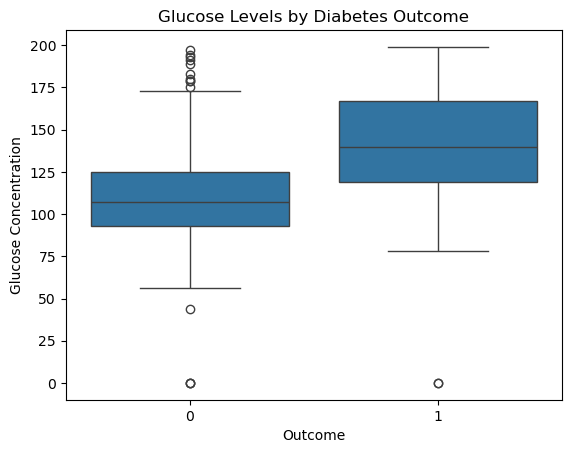

In [105]:

# Split groups
diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['Glucose Concentration']
non_diabetic = diabetes_df[diabetes_df['Outcome'] == 0]['Glucose Concentration']

# T-test
t_stat, p_val = ttest_ind(diabetic, non_diabetic, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.2e}")
if p_val < 0.05:
    print('Average glucose levels are different between diabetic and non-diabetic individuals')
else:
    print("There's no difference in average glucose levels between diabetic and non-diabetic individuals")
print("\n")

# Visualization
sns.boxplot(x='Outcome', y='Glucose Concentration', data=diabetes_df)
plt.title("Glucose Levels by Diabetes Outcome")
plt.show()


#### Result
Since the p-value is far below the conventional threshold of 0.05, we reject the null hypothesis. This provides strong statistical evidence that average glucose levels do differ between diabetic and non-diabetic individuals.

#### Intepretation
The extremely low p-value suggests that the observed difference in glucose concentration is not due to random chance. Diabetic individuals tend to have significantly higher glucose levels, which aligns with medical understanding of the condition.

#### Visualization:
The boxplot clearly shows that the median and overall distribution of glucose concentration is higher for diabetic individuals, reinforcing our statistical findings.

---

## Hypothesis Test 2: Age is not associated with diabetes outcome.

We aim to determine whether age group is statistically associated with diabetes outcome. This is a classic case for a Chi-squared test of independence, which evaluates whether two categorical variables are related.

#### Step 1. `Age Grouping` 
- The continuous Age variable is binned into categorical age groups: 20s, 30s, 40s, 50s, and 60+

In [106]:
diabetes_df['AgeGroup'] = pd.cut(diabetes_df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20s','30s','40s','50s','60+'])

#### Step 2. `Contingency Table` 
- A cross-tabulation is created to count the number of diabetic and non-diabetic individuals in each age group.

In [107]:
contingency = pd.crosstab(diabetes_df['AgeGroup'], diabetes_df['Outcome'])

#### Step 3. `Chi-squared Test` 
- We apply the chi2_contingency() function to test for independence between age group and diabetes outcome.

In [108]:
chi2, p_val, dof, expected = chi2_contingency(contingency)

#### Step 4. `Hypotheses`
- Null Hypothesis (H₀): Age group and diabetes outcome are independent.
- Alternative Hypothesis (H₁): Age group and diabetes outcome are associated.

In [109]:
print(f"Chi-squared: {chi2:.2f}, p-value: {p_val:.2e}")

if p_val < 0.05:
    print('Age group and diabetes outcome are associated')
else:
    print("Age group and diabetes outcome are independent")
print("\n")

Chi-squared: 81.66, p-value: 7.74e-17
Age group and diabetes outcome are associated




### Result:
Since the p-value is far below 0.05, we reject the null hypothesis. This indicates a statistically significant association between age group and diabetes outcome.

### Intepretation:
The test result suggests that the likelihood of having diabetes varies across age groups. Older individuals are more likely to be diabetic, which aligns with known epidemiological trends. This insight is crucial for targeted screening and preventive strategies.

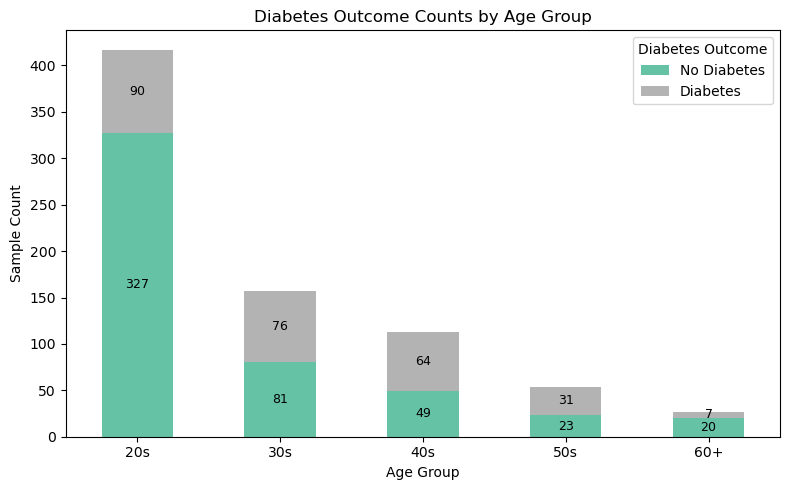

In [110]:
# Create crosstab with raw counts
age_outcome_counts = pd.crosstab(diabetes_df['AgeGroup'], diabetes_df['Outcome'])

# Plot stacked bar chart
ax = age_outcome_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9)

# Customize plot
plt.title('Diabetes Outcome Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sample Count')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'], loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

### Visualization:
Diabetes prevalence increases steadily with age, highlighting the need for early screening and lifestyle changes starting in the 30s.

---

## Hypothesis Test 3: BMI does not significantly differ between diabetic and non-diabetic individuals.
**Null Hypothesis (H₀)**: BMI does not significantly differ between diabetic and non-diabetic individuals.  
**Alternative Hypothesis (H₁)**: BMI significantly differs between diabetic and non-diabetic individuals.

###  Statistical Test: Welch’s t-test
Independent two-sample t-test (Welch’s t-test) will be performed to compare the BMI distributions of diabetic and non-diabetic individuals.


In [111]:

bmi_diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['BMI']
bmi_nondiabetic = diabetes_df[diabetes_df['Outcome'] == 0]['BMI']

# Perform independent t-test
t_stat, p_val = ttest_ind(bmi_diabetic, bmi_nondiabetic, equal_var=False)  # Welch's t-test
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.2e}")
if p_val < 0.05:
    print('BMI significantly differs between diabetic and non-diabetic individuals.')
else:
    print("BMI does not significantly differ between diabetic and non-diabetic individuals.")


T-statistic: 8.62, p-value: 6.57e-17
BMI significantly differs between diabetic and non-diabetic individuals.


#### Output:
- **T-statistic**: 8.62  
- **p-value**: 6.57 × 10⁻¹⁷

**Conclusion**: Since the p-value is far below the 0.05 threshold, we reject the null hypothesis.  
**BMI significantly differs** between diabetic and non-diabetic individuals.

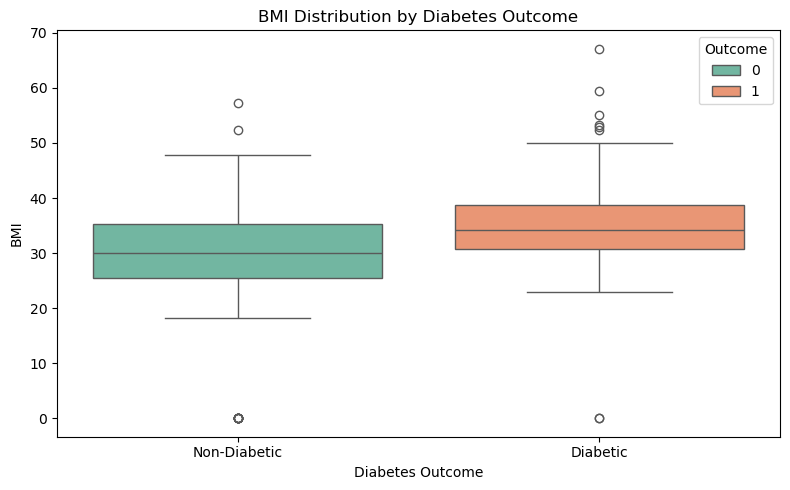

In [112]:
# Visualize BMI distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='BMI', hue='Outcome', data=diabetes_df, palette='Set2')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title('BMI Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

### Visualization: BMI Distribution by Diabetes Outcome
The boxplot below illustrates the BMI distribution for both groups:
- **Diabetic Group**:
  - Higher median BMI
  - Tighter interquartile range
- **Non-Diabetic Group**:
  - Lower median BMI
  - Wider spread and more outliers

This visual reinforces the statistical result, showing a clear upward shift in BMI among diabetic individuals.

### Interpretation
The analysis reveals a strong association between elevated BMI and diabetes. Individuals with diabetes tend to have significantly higher BMI values, suggesting that body mass is a key risk factor.

The findings highlight the importance of early weight management and lifestyle interventions to reduce diabetes risk.


---

## Hypothesis Test 4: The number of pregnancies does not affect diabetes likelihood.

To test whether the number of pregnancies is associated with diabetes outcome using a Chi-Squared Test of Independence.


#### **Step 1**: Group pregnancy counts into categorical bins
We categorize the continuous variable Number of Pregnancies into meaningful groups for comparison.

In [113]:
diabetes_df['PregnancyGroup'] = pd.cut(
    diabetes_df['Number of Pregnancies'],
    bins=[0, 2, 4, 6, 10, diabetes_df['Number of Pregnancies'].max()],
    labels=['0–2', '3–4', '5–6', '7–10', '11+']
)

#### **Step 2**: Create a contingency table
This table shows the count of diabetes outcomes (Outcome) across pregnancy groups.

In [114]:
# Create contingency table
pregnancy_table = pd.crosstab(diabetes_df['PregnancyGroup'], diabetes_df['Outcome'])

#### **Step 3**: Run Chi-Squared Test
We test the null hypothesis:
- H₀: Pregnancy count and diabetes outcome are independent.
- H₁: Pregnancy count and diabetes outcome are associated.

In [115]:
# Run Chi-Squared Test
chi2, p_val, dof, expected = chi2_contingency(pregnancy_table)
print(f"Chi-squared: {chi2:.2f}, p-value: {p_val:.2e}")
if p_val < 0.05:
    print('Number of pregnancies affects diabetes likelihood')
else:
    print("Number of pregnancies does affect diabetes likelihood")


Chi-squared: 56.57, p-value: 1.52e-11
Number of pregnancies affects diabetes likelihood


**Result**:
Chi-squared = 56.57, p-value = 1.52e-11
- Since p < 0.05, we reject the null hypothesis.
- Conclusion: The number of pregnancies does affect diabetes likelihood.


#### **Step 4**: Visualize outcome proportions by pregnancy group
We normalize the contingency table to show proportions and plot a stacked bar chart.

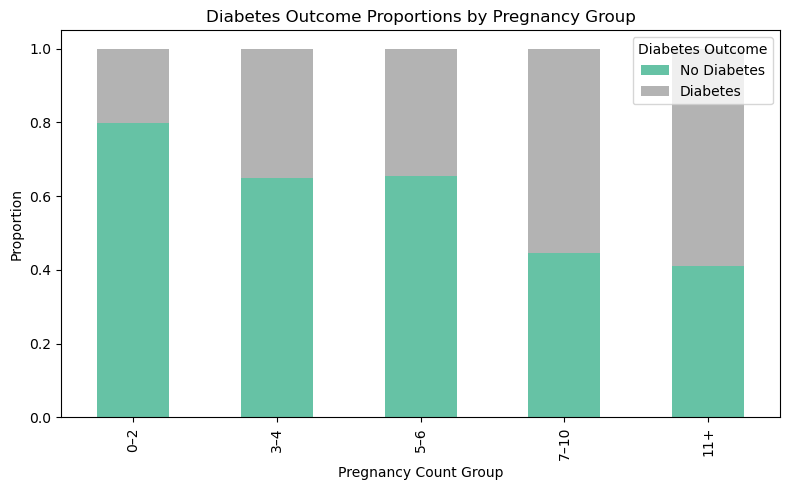

In [116]:

# Visualize the contingency table
pregnancy_outcome = pd.crosstab(diabetes_df['PregnancyGroup'], diabetes_df['Outcome'], normalize='index')

pregnancy_outcome.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 5))
plt.title('Diabetes Outcome Proportions by Pregnancy Group')
plt.xlabel('Pregnancy Count Group')
plt.ylabel('Proportion')
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()


### Insight:
As pregnancy count increases, the proportion of individuals with diabetes tends to rise — visually reinforcing the statistical result.


---

## Hypothesis Test 5: Blood pressure does not significantly differ between diabetic and non-diabetic individuals.

To determine whether blood pressure levels differ significantly between diabetic and non-diabetic individuals using a Mann–Whitney U test, a non-parametric alternative to the independent t-test.


#### **Step 1**: Filter out invalid blood pressure values
- We exclude entries with blood pressure readings of 0, which are likely missing or erroneous.

In [117]:
filtered_df = diabetes_df[diabetes_df['Blood Pressure (mmHg)'] > 0]

#### **Step 2**: Split blood pressure values by diabetes outcome
- We separate the blood pressure data into two groups based on diabetes status.

In [118]:
# Split BP values by diabetes outcome
bp_diabetic = filtered_df[filtered_df['Outcome'] == 1]['Blood Pressure (mmHg)']
bp_nondiabetic = filtered_df[filtered_df['Outcome'] == 0]['Blood Pressure (mmHg)']

#### **Step 3**: Run Mann–Whitney U Test
We test the null hypothesis:
- H₀: Blood pressure distributions are the same for diabetic and non-diabetic individuals.
- H₁: Blood pressure distributions differ between the two groups


In [119]:
# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(bp_diabetic, bp_nondiabetic, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.10f}")


Mann-Whitney U statistic: 73645.50, p-value: 0.0000016285


- **Result**:
Mann–Whitney U = 73645.50, p-value = 0.0000016285
Since p < 0.05, we reject the null hypothesis.
- **Conclusion**: Blood pressure does significantly differ between diabetic and non-diabetic individuals.



#### **Step 4**: Visualize blood pressure distribution
- We use a box plot to compare the distributions of blood pressure across diabetes outcomes.


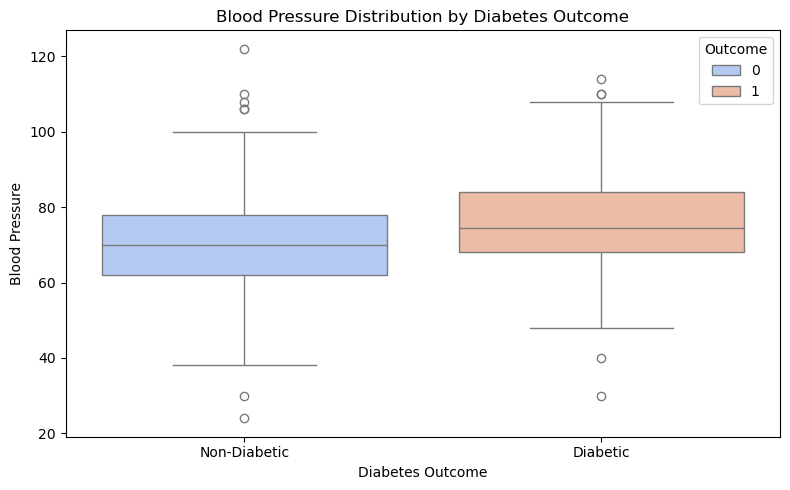

In [120]:

# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Blood Pressure (mmHg)', hue='Outcome', data=filtered_df, palette='coolwarm')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title('Blood Pressure Distribution by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Blood Pressure')
plt.tight_layout()
plt.show()


**Insight**:
The box plot reveals a slightly higher median blood pressure among diabetic individuals, with visible distributional differences—supporting the statistical result

---

## Hypothesis Test 6: Diabetes Pedigree Function does not significantly differ between diabetic and non-diabetic individuals.

#### Hypothesis Statement
- Null Hypothesis (H₀): The distribution of Diabetes Pedigree Function (DPF) does not significantly differ between diabetic and non-diabetic individuals.
- Alternative Hypothesis (H₁): The distribution of DPF significantly differs between the two groups.

#### **Step 1**: Data filtering
- We remove entries with zero or missing DPF values to ensure data quality. 
- DPF values of zero may indicate missing or invalid data in this context.

In [121]:
# Filter out any missing or zero DPF values if needed
filtered_df = diabetes_df[diabetes_df['Diabetes Pedigree Function'] > 0]

#### **Step 2**: Grouping by Outcome
We separate the DPF values into two groups:
- Diabetic (Outcome = 1)
- Non-Diabetic (Outcome = 0)

In [122]:
# Split DPF by diabetes outcome
dpf_diabetic = filtered_df[filtered_df['Outcome'] == 1]['Diabetes Pedigree Function']
dpf_nondiabetic = filtered_df[filtered_df['Outcome'] == 0]['Diabetes Pedigree Function']


#### **Step 3**: Mann–Whitney U Test

In [123]:
# Mann–Whitney U Test
u_stat, p_val = mannwhitneyu(dpf_diabetic, dpf_nondiabetic, alternative='two-sided')
print(f"Mann–Whitney U statistic: {u_stat:.2f}, p-value: {p_val:.6f}")

Mann–Whitney U statistic: 81231.00, p-value: 0.000001


**Result**: Mann–Whitney U statistic: 81231.00 p-value: 0.000001
- Since the p-value is very low (< 0.05), we reject the null hypothesis.

**Conclusion**: There is a statistically significant difference in DPF between diabetic and non-diabetic individuals.

#### **Step 4**: Visualization
- A boxplot helps visualize the distribution and spread of DPF values across both groups.
- The plot clearly shows a difference in median and spread, supporting the statistical result.

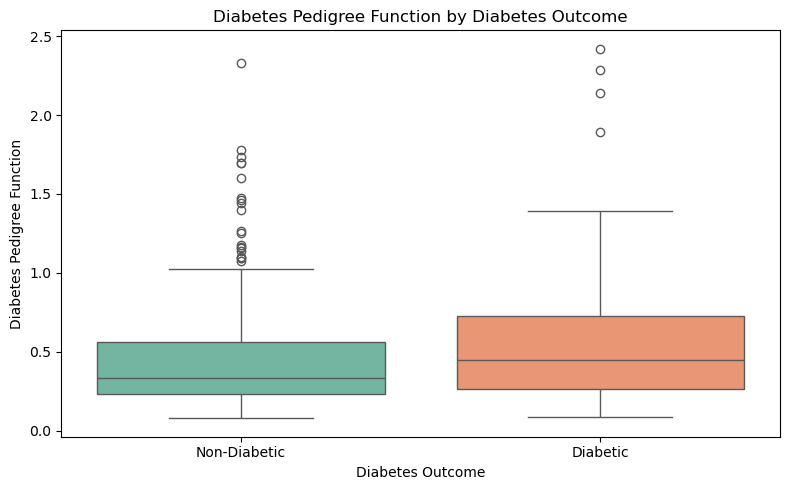

In [124]:
# Visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Diabetes Pedigree Function', hue='Outcome', data=filtered_df, palette='Set2', legend=False)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.title('Diabetes Pedigree Function by Diabetes Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.tight_layout()
plt.show()